# day 9 of #66daysofdata_NLP
## word2vec


* ref: 
- [https://towardsdatascience.com](https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92)
* data set:
- [Car Features and MSRP](https://www.kaggle.com/CooperUnion/cardataset) 
- Context:
    - Cars dataset with features including make, model, year, engine, and other properties of the car used to predict its price.


### Word Embedding simple explanation

The most benefits from `Word Embedding` is
even unseen words during traning can be predicted well, since pretrained word embedding already trained with larger data set than your train data.

for example, `it is a good movie` is similar to `this is the best show`
- `this` is similar to `it`, 
- `best` is similar to `good` and 
- `show` is similar to `movie` in pretrained word embedding vector.

`Word2vec` is one of the most popular technique to learn word embeddings using a two-layer neural network. Its `input is a text corpus` and its `output is a set of vector`s. 
    -Word embedding via word2vec can make natural language computer-readable, then further implementation of mathematical operations on words can be used to `detect their similarities`.

![App Screenshot](../images/word2vec.png)

There are two main training algorithms for word2vec, one is the continuous `bag of words(CBOW)`, another is called `skip-gram`. The major difference between these two methods is that 
- __CBOW__ is using context to predict a target word 
- __Skip-gram__ is using a word to predict a target context.

In [ ]:
# install gensim
# ! conda install -c conda-forge gensim -y
# ! pip install python-Levenshtein

In [55]:

# load the libraries
import gensim
import pandas as pd
import numpy as np
import random

###  Load data set

In [13]:
df = pd.read_csv('../datasets/kaggle_Car_Feature.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Data Preprocessing:

In [20]:
# step a. Create a new column for Make Model

df['Maker_Model']= df['Make']+ " " + df['Model']

# step b
''' 
. Generate a format of ‘ list of lists’ for each Make Model with the following features: 
- Engine Fuel Type, 
- Transmission Type, 
- Driven_Wheels, 
- Market Category, 
- Vehicle Size, 
- Vehicle Style.
'''
# Select features from original dataset to form a new dataframe 
df1 = df[['Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size', 'Vehicle Style', 'Maker_Model']]# For each row, combine all the columns into one column
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)# Store them in a pandas dataframe
df_clean = pd.DataFrame({'clean': df2})# Create the list of list format of the custom corpus for gensim modeling 
sent = [row.split(',') for row in df_clean['clean']]# show the example of list of list format of the custom corpus for gensim modeling 
for i,s in enumerate(sent[:2]): print(f'sentence {i}: {s}')

sentence 0: ['premium unleaded (required)', 'MANUAL', 'rear wheel drive', 'Factory Tuner', 'Luxury', 'High-Performance', 'Compact', 'Coupe', 'BMW 1 Series M']
sentence 1: ['premium unleaded (required)', 'MANUAL', 'rear wheel drive', 'Luxury', 'Performance', 'Compact', 'Convertible', 'BMW 1 Series']


### Genism word2vec Model Training
- `vector_size=`: The number of dimensions of the embeddings and the default is 100.
- `window`: The maximum distance between a target word and words around the target word. The default window is 5.
- `min_count`: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.
- `workers`: The number of partitions during training and the default workers is 3.
- `sg`: The training algorithm, either `CBOW(0)` or `skip gram(1)`. The default training algorithm is CBOW.

In [48]:
w2v_model = gensim.models.Word2Vec(sent, min_count=1, vector_size= 50, workers=3, window=3, sg=1)

In [49]:
# word --2--> vec 
w2v_model.wv['Toyota Camry']

array([ 0.00347449,  0.13032234,  0.00895088, -0.09915188, -0.06617405,
       -0.21336047,  0.01785152,  0.28678197, -0.09003174, -0.08053584,
        0.05317251,  0.03519896,  0.09932595, -0.02155515, -0.03664923,
        0.17413662,  0.15097705,  0.28421023, -0.13789123, -0.29265764,
       -0.04684168, -0.06329048,  0.26266465,  0.08241056,  0.16732113,
       -0.00395776, -0.03883987,  0.3773339 , -0.04600707,  0.00162903,
        0.02688237,  0.02481543,  0.02809183,  0.00681855,  0.08621044,
       -0.12081461,  0.17721352, -0.01819158,  0.04662257,  0.06602315,
        0.08958791, -0.03087981, -0.21251164,  0.07870276,  0.33582726,
        0.05693889, -0.01815337, -0.14781004,  0.00249605,  0.02172189],
      dtype=float32)

In [92]:
# Retrieve the weights from the model. 
w2v_weights = w2v_model.wv.vectors
vocab_size, embedding_size = w2v_weights.shape
print("Vocabulary Size: {} - Embedding Dim: {} ".format(vocab_size, embedding_size))
# summarize vocabulary
words = (w2v_model.wv.index_to_key)


Vocabulary Size: 977 - Embedding Dim: 50 


In [46]:
# word similarity
car1, car2, car3 = 'Porsche 718 Cayman', 'Nissan Van',  'Mercedes-Benz SLK-Class'
sim1 = w2v_model.wv.similarity(car1, car2)
sim2 = w2v_model.wv.similarity(car1, car3)
print(f"Similarity between '{car1}' and '{car2}'              is: '{sim1}'")
print(f"Similarity between '{car1}' and '{car3}' is: '{sim2}'")

Similarity between 'Porsche 718 Cayman' and 'Nissan Van'              is: '0.7824785709381104'
Similarity between 'Porsche 718 Cayman' and 'Mercedes-Benz SLK-Class' is: '0.8899672031402588'


In [47]:
# top 3 most similar cars to a sample car
w2v_model.wv.most_similar(car1, topn=3)

[('Mercedes-Benz CL-Class', 0.9264065623283386),
 ('Rolls-Royce Phantom Coupe', 0.9241892099380493),
 ('Lexus LS 430', 0.923305869102478)]

In [ ]:
## Visualizing Word2Vec Embeddings with t-SNE 

In [88]:
def token2word(w2v_model, token):
    return w2v_model.wv.index_to_key[token]

# selecting some random icd_words
n_samples = 20
random.seed = 10
random_i = random.sample(range(vocab_size), n_samples)
random_car = [token2word(w2v_model,i) for i in random_i]
# Generate Word2Vec embeddings of each word
word_vecs = np.array([w2v_model.wv[w] for w in random_car])

print(f"word vector for '{random_car[0]}' is:\n {word_vecs[0]}")

word vector for 'Mitsubishi Sigma' is:
 [ 1.74077973e-03  1.58903450e-02 -9.48515814e-03 -1.39614427e-02
 -1.40139610e-02 -1.80027280e-02 -1.12549588e-02  3.29277031e-02
 -2.34959293e-02 -1.63744632e-02 -9.99915972e-03 -6.11203443e-03
 -1.62933543e-02  1.16924439e-02  1.07208444e-02  7.84136914e-03
  2.84997616e-02  1.94774177e-02 -1.34006524e-02 -1.55810062e-02
 -1.55165205e-02 -9.04150028e-03  9.30931978e-03  3.85684171e-03
  3.45184505e-02 -2.95178033e-05 -3.16180661e-02  5.35102934e-02
 -1.96260866e-02 -1.45845544e-02 -1.07832383e-02  4.34568990e-03
 -8.18881579e-03 -7.49885570e-03  1.70166772e-02  1.02918446e-02
  5.26688434e-03 -1.95523985e-02  6.97551481e-03 -3.10944486e-03
 -1.02877738e-02 -1.33478716e-02 -7.24259531e-04  8.39989074e-03
  3.18476595e-02 -2.62905704e-03  1.47860600e-02  1.02942102e-02
  6.90464070e-03  9.82937962e-03]


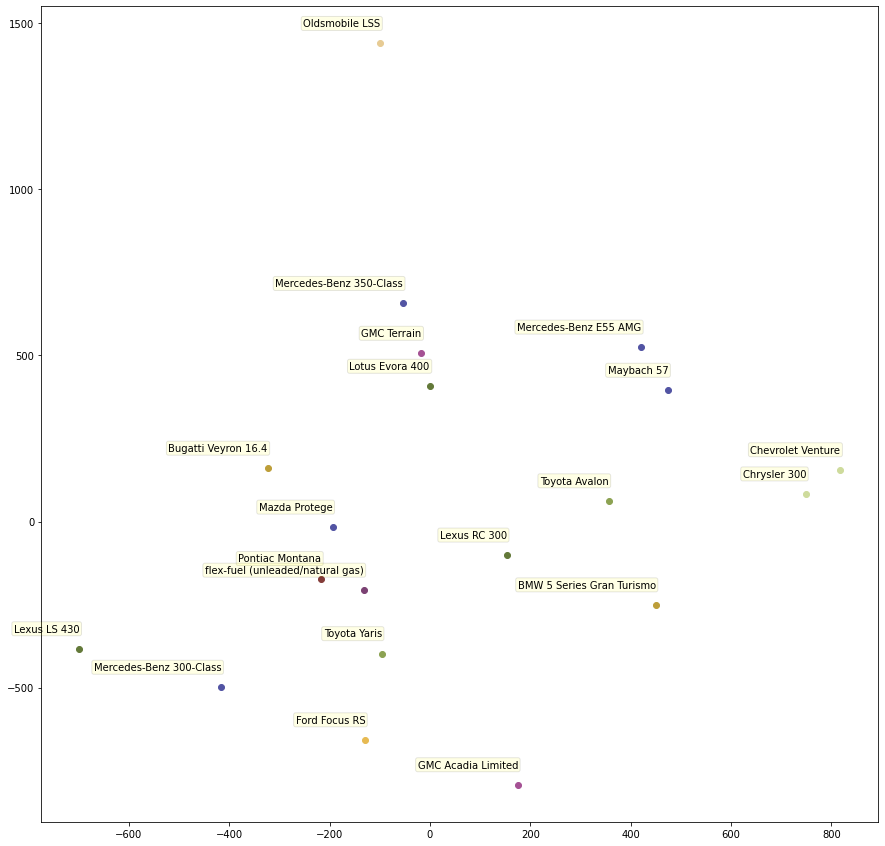

In [91]:
from functools import partial
import matplotlib.pyplot   as plt
from sklearn.manifold      import TSNE

c=list(set([w[0] for w in random_icd]))
colormap = plt.cm.get_cmap('tab20b',len(c))#plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in range(len(c))]
color_dict = {c[i]: colorst[i] for i in range(len(c))}


# Apply t-SNE to Word2Vec embeddings, reducing to 2 dims
tsne = TSNE(n_components=2, init='pca', random_state=0, perplexity=1)
tsne_e = tsne.fit_transform(word_vecs)

# Plot t-SNE result
plt.figure(figsize=(15, 15))
#plt.scatter(tsne_e[:, 0], tsne_e[:, 1], marker='o', c=range(len(random_icd)), cmap=plt.get_cmap('Spectral'))

for label, x, y, in zip(random_icd, tsne_e[:, 0], tsne_e[:, 1]):
    #print(label[0], color_dict[label[0]])
    color = np.array(color_dict[label[0]]).reshape(1,-1)
    plt.scatter(x, y, marker='o', c=color, cmap=plt.get_cmap('Spectral'))
    
    plt.annotate(label,
                 xy=(x, y), xytext=(0, 15),
                 textcoords='offset points', ha='right', va='bottom',
                 bbox=dict(boxstyle='round, pad=0.2', fc='yellow', alpha=0.1))